# TP2 GaboG

Para la imagen suministrada "metalgrid". Implementar un algoritmo que: 

1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def aux_plot(img, title1 = None, title2 = None):
    if len(img) == 1:
        plt.figure(figsize= (10,10))
        ax1=plt.subplot(111)
        ax1.set_title(f'{title1}')
        ax1.imshow(img[0], cmap='gray')
    if len(img) == 2:
        plt.figure(figsize= (12,12))
        ax1=plt.subplot(121)
        ax1.set_title(f'{title1}')
        ax1.imshow(img[0], cmap='gray')
        ax2=plt.subplot(122)
        ax2.set_title(f'{title2}')
        ax2.imshow(img[1], cmap='gray')

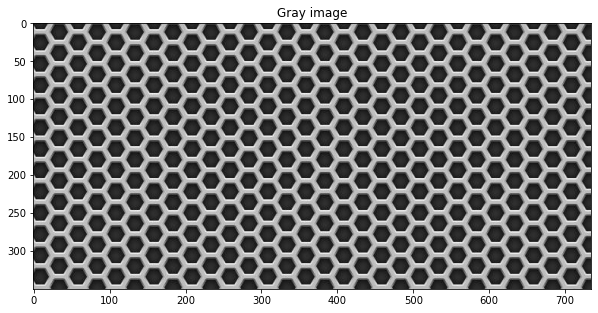

In [3]:
# Lectura de la imagen y transformación a escala de grises. 
img = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

aux_plot([gray], 'Gray image')

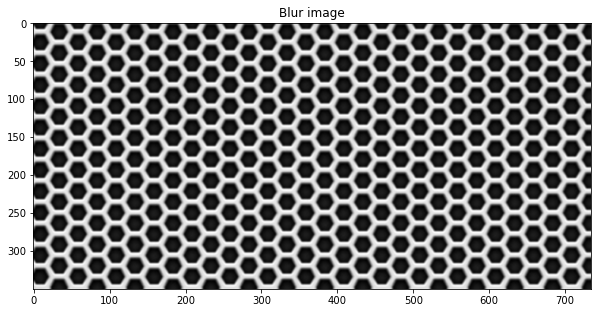

In [4]:
# Aplico suavizado Gaussiano
blur = cv.GaussianBlur(gray,(5,5),0)

aux_plot([blur], 'Blur image')

1.

In [5]:
# Gradientes
#===========

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

In [6]:
# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

2. 

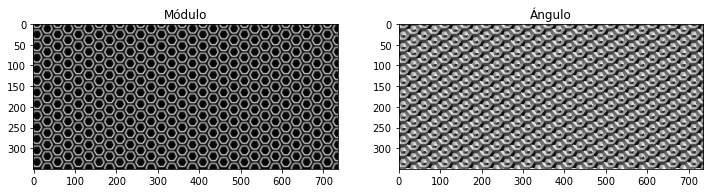

In [7]:
aux_plot([mag, angle], 'Módulo', 'Ángulo')

3. 

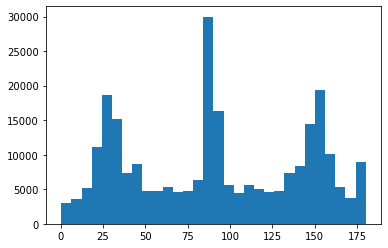

In [8]:
# Histograma de direcciones del gradiente
angle[angle <= 0] += 180
plt.hist(angle.ravel(), bins=30)
plt.show()

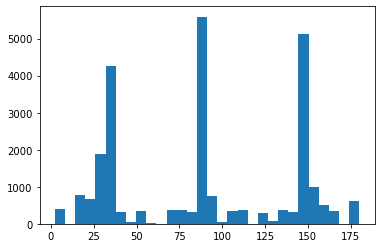

In [9]:
# Histograma con umbral
p = 90
limit = np.percentile(mag.ravel(), p)
angle_p = angle[mag > limit]
plt.hist(angle_p.ravel(), bins=30)
plt.show()

In [10]:
# Se calculan las direcciones principales (máximos 3 valores del histograma)
hist, bin_edges = np.histogram(angle_p.ravel(), bins=30)
idx = np.argsort(hist)[-3:]
max_angles = ((bin_edges[idx + 1] + bin_edges[idx])/2)
print(f"Direcciones principales: {max_angles}")

Direcciones principales: [ 34.870667 147.41995   88.18348 ]


In [11]:
# Se crea un diccionario con las máscaras para cada dirección principal
width = 10
limit = np.percentile(mag.ravel(),90).round() # umbral de intensidad
idx = {}
for i in range(len(max_angles)):
    idx[i] = (angle > max_angles[i]-width) & (angle < max_angles[i]+width) & (mag > limit)

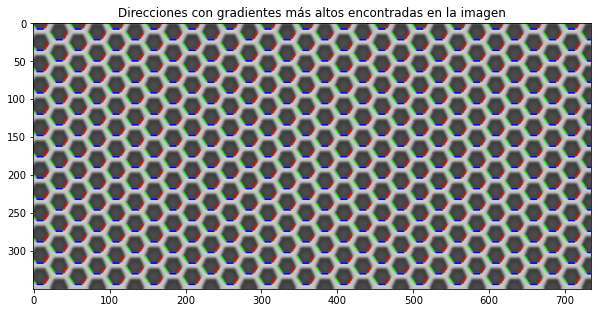

In [12]:
# Se muestran en la imagen las direcciones principales encontradas
output = cv.cvtColor(blur,cv.COLOR_GRAY2RGB).copy()
output[idx[0],:] = [255,0,0]
output[idx[1],:] = [0,255,0]
output[idx[2],:] = [0,0,255]
aux_plot([output], 'Direcciones con gradientes más altos encontradas en la imagen')